## **Code used to generate Figure 1E.**

##### **First we load the stats csv file for Old ants as a dataframe, and calculate values needed for downstream steps.**


In [ ]:
import pandas as pd
import numpy as np
import glob
from natsort import natsorted

#This script is used to load the stats file and calculate the mean-normalized step size for each ant.

#Loads the stats file as a dataframe, which contains the larva detection frame, transition point, and the length of P1 and P2 for each ant.
#It also calculates the mean length of P1 and P2 for all ants, and then calculates the mean-normalized step size for each ant.
#This is done by dividing the mean length of P1 or P2 by the actual length of P1 or P2 for each ant.
#The checksum column is the sum of the true detection frame, P1 length, and P2 length for each ant. This should be 90000 for all ants.
#The stats dataframe is then created with the columns: 'ant_number', 'larva det (frame)', 'transition pt (frame)', 'P1length', 'P2length', 'normP1', 'normP2', 'checksum'
#The stats dataframe can be printed to check that it is correct.
stats = pd.DataFrame(pd.read_csv('/Users/Alex/Desktop/Figure_1E_Code_and_Data/Old/Oldexptstats.csv'))
stats['P1length'] = stats['transition pt (frame)'] - stats['larva det (frame)']
stats['P2length'] = 90000 - stats['transition pt (frame)']
meanP1 = int(np.round(stats['P1length'].mean())) # mean length in frames of P1
meanP2 = int(np.round(stats['P2length'].mean())) # mean length in frames of P2
stats['normP1'] = meanP1/stats['P1length'] #adds mean-normalized frame step size for each ant to stats
stats['normP2'] = meanP2/stats['P2length'] #adds mean-normalized frame step size for each at to stats
stats['checksum'] = stats['larva det (frame)'] + stats['P1length'] + stats['P2length'] #this should be 90000 for all ants
#stats columns are 0: 'ant_number', 1: 'larva det (frame)', 2: 'transition pt (frame)', 3: 'P1length', 4: 'P2length', 5: 'normP1', 6: 'normP2', 7: 'checksum'
stats

,ant_number,larva det (frame),transition pt (frame),P1length,P2length,normP1,normP2,checksum
0,1,18365,42098,23733,47902,0.811570,1.349777,90000
1,2,12260,24103,11843,65897,1.626362,0.981183,90000
2,3,12020,50826,38806,39174,0.496341,1.650508,90000
3,4,15723,54915,39192,35085,0.491452,1.842867,90000
4,5,12633,28970,16337,61030,1.178980,1.059430,90000
...,...,...,...,...,...,...,...,...
138,139,2288,19273,16985,70727,1.134001,0.914177,90000
139,140,2053,17536,15483,72464,1.244010,0.892264,90000
140,141,2178,14285,12107,75715,1.590898,0.853952,90000
141,142,2845,21383,18538,68617,1.039001,0.942288,90000


##### **Next we load the timedata_*.csv files for all Old ants as a dataframe, and add columns needed for downstream steps.**
##### *Note: this cell will take ~6 minutes to run on an Apple M2 Pro laptop.*

In [ ]:
#Imports all filenames to a list of strings, such that they can be loaded one by one in the loop. These are unsorted.
fnames = glob.glob('/Users/Alex/Documents/Kronauer Lab/NP_Screen/Young_Old_control_graphing_2020/young_old_timedata/Old/timedata_*.csv')

#natsorted takes the unsorted filenames and puts them into natural order.
sfnames = natsorted(fnames)


df = pd.DataFrame() #initialize empty master df
i=0
for x in sfnames:
    file = sfnames[i] #loads file i
    dal = pd.read_csv(file, usecols=[4])*1000 #loads 'dal' (distance between ant and larva) column from timedata_i.csv as df and converts to mm
    dal['ant_id'] = [i+1 for y in dal['dal']] #adds ant id column to dal
    dal['frame'] = np.arange(0,len(dal['dal'])) #add frame count column to dal
    dal['phase'] = ['out' if j < stats.iloc[i,1] else 'P1' if stats.iloc[i,1] <= j < (stats.iloc[i,1]+stats.iloc[i,3]) else 'P2' for j in dal['frame']] #labels phase of each ant's dal data
    P1 = np.linspace(0, meanP1, num=stats.iloc[i,3], endpoint=False) #returns array of mean-normalized frame values from 0 to meanP1 by normP1 step, with correct number of values (P1 length for current ant). Ignores stop value so that array is correct length.
    P2 = np.linspace(meanP1, (meanP1+meanP2), num=stats.iloc[i,4], endpoint=False) #returns array of mean-normalized frame values from meanP1 to meanP2 by normP2 step with correct number of values (P2 length for current ant). Ignores stop value so that array is correct length
    nanlist = [np.nan for j in range(stats.iloc[i,1])] #list of NaNs for frames in dal before ant has detected the larva
    phase_array = np.concatenate([nanlist, P1, P2]) #concats normalized frame lists for the current ant
    phase_array_list = phase_array.tolist() #coverts NaN+normalized frame to a list
    dal['normframe'] = phase_array_list #adds 'normframe' column to dal df. This should result in all ants having aligned true larva detect and transpoints as P1 and P2 will have the same length for all ants.
    frames = [df, dal] #list of master df and current dal dataframe for concat
    df = pd.concat(frames, ignore_index=True) #concats current dal onto master df
    i+=1

df['age']='Old' #Add a column caled 'Age' with value 'Old'

df

,dal,ant_id,frame,phase,normframe,age
0,14.640060,1,0,out,NaN,Old
1,14.663800,1,1,out,NaN,Old
2,14.637232,1,2,out,NaN,Old
3,14.619795,1,3,out,NaN,Old
4,14.653490,1,4,out,NaN,Old
...,...,...,...,...,...,...
12869995,11.275218,143,89995,P2,83906.194815,Old
12869996,11.550106,143,89996,P2,83908.555852,Old
12869997,11.914891,143,89997,P2,83910.916889,Old
12869998,12.119354,143,89998,P2,83913.277926,Old


##### **Next we interpolate the Old ant dal values over the normframe values for each ant.**

In [ ]:
# These lines take the dal data for each ant and interpolate over the mean-normalized frame values
# Then creates new_dal values for mean # of frames for each of P1 and P2 for every ant
# Then adds these data into a new dataframe 'interpolated_dal'

import scipy

means = pd.DataFrame([[0, meanP1],[meanP1,(meanP1+meanP2)]], columns = ['start', 'phasemeans'])

interpolated_dal = pd.DataFrame()
for ant in set(df['ant_id']):
    temp = df[df['ant_id']==ant]
    temp2 = pd.DataFrame()
    j=0
    for phase in ['P1', 'P2']:
        temp3 = pd.DataFrame()
        temp2 = temp[temp['phase'] == phase]
        
        interps = scipy.interpolate.interp1d(temp2['normframe'], temp2['dal'], bounds_error=False, fill_value='NaN') #interpolates over the mean-normalized frame values for current ant and phase
        temp3['newframe'] = range(means.iloc[j,0], means.iloc[j,1])
        temp3['new_dal'] = interps(temp3['newframe'])
        temp3['ant_id'] = ant
        temp3['phase'] = phase
        dflist = [interpolated_dal, temp3]
        interpolated_dal = pd.concat(dflist, ignore_index = True)
        j+=1

interpolated_dal['hours'] = interpolated_dal['newframe']/18000 #converts newframes to hours. Note that this is a Normalized time, not actual time.
interpolated_dal['Age'] = 'Old' #adds 'Age' column with value 'Old'

interpolated_dal

,newframe,new_dal,ant_id,phase,hours,Age
0,0,2.015780,1,P1,0.000000,Old
1,1,1.961896,1,P1,0.000056,Old
2,2,1.959620,1,P1,0.000111,Old
3,3,1.892787,1,P1,0.000167,Old
4,4,0.133824,1,P1,0.000222,Old
...,...,...,...,...,...,...
12000269,83913,12.095286,143,P2,4.661833,Old
12000270,83914,12.151613,143,P2,4.661889,Old
12000271,83915,12.196288,143,P2,4.661944,Old
12000272,83916,NaN,143,P2,4.662000,Old


##### *These data can be saved to csv with the following code:*

In [4]:
#save Old ant interpolated_dal to csv.
interpolated_dal.to_csv('/Users/Alex/Desktop/Figure_1E_Code_and_Data/output_files/Old_interpolated_dal.csv', index=False)

##### **Next we load the stats csv file for Young ants as a dataframe, and calculate values needed for downstream steps.**

In [ ]:
#This script is used to load the stats file and calculate the mean-normalized step size for each ant. This will overwrite the previous stats dataframe.

#Loads the stats file as a dataframe, which contains the larva detection frame, transition point, and the length of P1 and P2 for each ant.
#It also calculates the mean length of P1 and P2 for all ants, and then calculates the mean-normalized step size for each ant.
#This is done by dividing the mean length of P1 or P2 by the actual length of P1 or P2 for each ant.
#The checksum column is the sum of the true detection frame, P1 length, and P2 length for each ant. This should be 90000 for all ants.
#The stats dataframe is then created with the columns: 'ant_number', 'larva det (frame)', 'transition pt (frame)', 'P1length', 'P2length', 'normP1', 'normP2', 'checksum'
#The stats dataframe can be printed to check that it is correct.
stats = pd.DataFrame(pd.read_csv('/Users/Alex/Desktop/Figure_1E_Code_and_Data/Young/Youngexptstats.csv'))
stats['P1length'] = stats['transition pt (frame)'] - stats['larva det (frame)']
stats['P2length'] = 90000 - stats['transition pt (frame)']
meanP1 = int(np.round(stats['P1length'].mean())) # mean length in frames of P1
meanP2 = int(np.round(stats['P2length'].mean())) # mean length in frames of P2
stats['normP1'] = meanP1/stats['P1length'] #adds mean-normalized frame step size for each ant to stats
stats['normP2'] = meanP2/stats['P2length'] #adds mean-normalized frame step size for each at to stats
stats['checksum'] = stats['larva det (frame)'] + stats['P1length'] + stats['P2length'] #this should be 90000 for all ants
#stats columns are 0: 'ant_number', 1: 'larva det (frame)', 2: 'transition pt (frame)', 3: 'P1length', 4: 'P2length', 5: 'normP1', 6: 'normP2', 7: 'checksum'
stats



,ant_number,larva det (frame),transition pt (frame),P1length,P2length,normP1,normP2,checksum
0,1,12258,82094,69836,7906,0.429377,5.736656,90000
1,2,7347,27957,20610,62043,1.454925,0.731009,90000
2,3,28208,75146,46938,14854,0.638843,3.053319,90000
3,4,16149,58069,41920,31931,0.715315,1.420375,90000
4,5,13884,45876,31992,44124,0.937297,1.027876,90000
...,...,...,...,...,...,...,...,...
138,139,3958,30880,26922,59120,1.113810,0.767152,90000
139,140,28874,60011,31137,29989,0.963034,1.512355,90000
140,141,11355,40868,29513,49132,1.016027,0.923105,90000
141,142,11684,45499,33815,44501,0.886766,1.019168,90000


##### **Next we load the timedata_*.csv files for all Young ants as a dataframe, and add columns needed for downstream steps.**
##### *Note: this cell will take ~6 minutes to run on an Apple M2 Pro laptop.*

In [6]:
#Imports all filenames to a list of strings, such that they can be loaded one by one in the loop. These are unsorted.
fnames2 = glob.glob('/Users/Alex/Desktop/Figure_1E_Code_and_Data/Young/timedata_*.csv')

#natsorted takes the unsorted filenames and puts them into natural order.
sfnames2 = natsorted(fnames2)
#sfnames

df2 = pd.DataFrame() #initialize empty master df for the Young ant data

i=0
for x in sfnames2:
    file = sfnames2[i] #loads file i
    dal2 = pd.read_csv(file, usecols=[4])*1000 #loads 'dal' column from timedata_i.csv as df and converts to mm
    dal2['ant_id'] = [i+1 for y in dal['dal']] #adds ant id column to dalshift
    dal2['frame'] = np.arange(0,len(dal['dal'])) #add frame count column to dalshift
    dal2['phase'] = ['out' if j < stats.iloc[i,1] else 'P1' if stats.iloc[i,1] <= j < (stats.iloc[i,1]+stats.iloc[i,3]) else 'P2' for j in dal2['frame']] #labels phase of each ants dal data
    P1 = np.linspace(0, meanP1, num=stats.iloc[i,3], endpoint=False) #returns array of mean-normalized frame values from 0 to meanP1 by normP1 step, with correct number of values (P1 length for current ant). Ignores stop value so that array is correct length.
    P2 = np.linspace(meanP1, (meanP1+meanP2), num=stats.iloc[i,4], endpoint=False) #returns array of mean-normalized frame values from meanP1 to meanP2 by normP2 step with correct number of values (P2 length for current ant). Ignores stop value so that array is correct length
    nanlist = [np.nan for j in range(stats.iloc[i,1])] #NaNs to for frames in dal before ant has detected the larva
    phase_array = np.concatenate([nanlist, P1, P2]) #concats normalized frame lists for the current ant
    phase_array_list = phase_array.tolist() #coverts NaN+normalized frame to a list
    dal2['normframe'] = phase_array_list #adds 'normframe' column to dal df. This should result in all ants having aligned true larva detect and transpoints as S1 and S2 will have the same length for all ants.
    frames = [df2, dal2] #list of master df and current dal dataframe for concat
    df2 = pd.concat(frames, ignore_index=True) #concats current dal onto master df
    i+=1

df2['age']='Young' #Add a column caled 'Age' with value 'Young'

df2

,dal,ant_id,frame,phase,normframe,age
0,11.360753,1,0,out,NaN,Young
1,11.380128,1,1,out,NaN,Young
2,11.375334,1,2,out,NaN,Young
3,11.373762,1,3,out,NaN,Young
4,11.367364,1,4,out,NaN,Young
...,...,...,...,...,...,...
12869995,0.000000,143,89995,P2,75335.750745,Young
12869996,0.000000,143,89996,P2,75336.600596,Young
12869997,0.000000,143,89997,P2,75337.450447,Young
12869998,0.000000,143,89998,P2,75338.300298,Young


##### **Next we interpolate the Young ant dal values over the normframe values for each ant.**

In [7]:
# these lines take the dal data for each Young ant and interpolate over the norm'd frame values
# Then creates new values for mean # frames for each of P1 and P2.
# Then adds these data into a new dataframe 'interpolated_dal2'

import scipy

means = pd.DataFrame([[0, meanP1],[meanP1,(meanP1+meanP2)]], columns = ['start', 'phasemeans'])

interpolated_dal2 = pd.DataFrame()
for ant in set(df2['ant_id']):
    temp = df2[df2['ant_id']==ant]
    temp2 = pd.DataFrame()
    j=0
    for phase in ['P1', 'P2']:
        temp3 = pd.DataFrame()
        temp2 = temp[temp['phase'] == phase]
        
        interps = scipy.interpolate.interp1d(temp2['normframe'], temp2['dal'], bounds_error=False, fill_value='NaN')
        temp3['newframe'] = range(means.iloc[j,0], means.iloc[j,1])
        temp3['new_dal'] = interps(temp3['newframe'])
        temp3['ant_id'] = ant
        temp3['phase'] = phase
        dflist = [interpolated_dal2, temp3]
        interpolated_dal2 = pd.concat(dflist, ignore_index = True)
        j+=1

interpolated_dal2['hours'] = interpolated_dal2['newframe']/18000 #converts newframes to hours. Note that this is a Normalized time, not actual time.
interpolated_dal2['Age'] = 'Young'

interpolated_dal2

,newframe,new_dal,ant_id,phase,hours,Age
0,0,0.0,1,P1,0.000000,Young
1,1,0.0,1,P1,0.000056,Young
2,2,0.0,1,P1,0.000111,Young
3,3,0.0,1,P1,0.000167,Young
4,4,0.0,1,P1,0.000222,Young
...,...,...,...,...,...,...
10773615,75335,0.0,143,P2,4.185278,Young
10773616,75336,0.0,143,P2,4.185333,Young
10773617,75337,0.0,143,P2,4.185389,Young
10773618,75338,0.0,143,P2,4.185444,Young


##### *These data can be saved to csv with the following code:*

In [8]:
#save interpolate_dal2 to csv
interpolated_dal2.to_csv('/Users/Alex/Desktop/Figure_1E_Code_and_Data/output_files/Young_interpolated_dal.csv', index=False)

##### **Next concatenate the Young and Old interpolated dal dataframes.**

In [9]:
interpolated_dal3 = pd.concat([interpolated_dal2,interpolated_dal], ignore_index = True)
interpolated_dal3

,newframe,new_dal,ant_id,phase,hours,Age
0,0,0.000000,1,P1,0.000000,Young
1,1,0.000000,1,P1,0.000056,Young
2,2,0.000000,1,P1,0.000111,Young
3,3,0.000000,1,P1,0.000167,Young
4,4,0.000000,1,P1,0.000222,Young
...,...,...,...,...,...,...
22773889,83913,12.095286,143,P2,4.661833,Old
22773890,83914,12.151613,143,P2,4.661889,Old
22773891,83915,12.196288,143,P2,4.661944,Old
22773892,83916,NaN,143,P2,4.662000,Old


##### **You can update the column names to more descriptive titles.**

In [10]:
#change column names to more descriptive names
interpolated_dal3 = interpolated_dal3.rename(columns={'new_dal':'Interpolated Distance between Ant and Larva (mm)', 'hours':'Normalized Time (hours)', 'ant_id':'Ant ID', 'phase':'Phase' })

interpolated_dal3

,newframe,Interpolated Distance between Ant and Larva (mm),Ant ID,Phase,Normalized Time (hours),Age
0,0,0.000000,1,P1,0.000000,Young
1,1,0.000000,1,P1,0.000056,Young
2,2,0.000000,1,P1,0.000111,Young
3,3,0.000000,1,P1,0.000167,Young
4,4,0.000000,1,P1,0.000222,Young
...,...,...,...,...,...,...
22773889,83913,12.095286,143,P2,4.661833,Old
22773890,83914,12.151613,143,P2,4.661889,Old
22773891,83915,12.196288,143,P2,4.661944,Old
22773892,83916,NaN,143,P2,4.662000,Old


##### *The final dataframe with the interpolated dal data for both Young and Old ants that is used for plotting can be saved:*

In [ ]:
#save interpolated_dal3 to csv
interpolated_dal3.to_csv('/Users/Alex/Desktop/Figure_1E_Code_and_Data/output_files/Fig_1E_Young_Old_interpolated_dal_data.csv', index=False)

##### **Finally, generate the plot which will show the average of the interpolated data with the 95% CI:**

##### *Note, plotting the full dataset, as in Figure 1E, may take ~17 minutes on an Apple M2 Pro laptop. To reduce the run time, sub-sample the data taking every 5th or 10th row etc. of interpolated_dal3. The original movies were shot at 5 frames per second, so sub-sampling by multiples of 5 is recommended to generate a similar plot.*

/Users/Alex/mambaforge/envs/antbehavior/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/Alex/mambaforge/envs/antbehavior/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


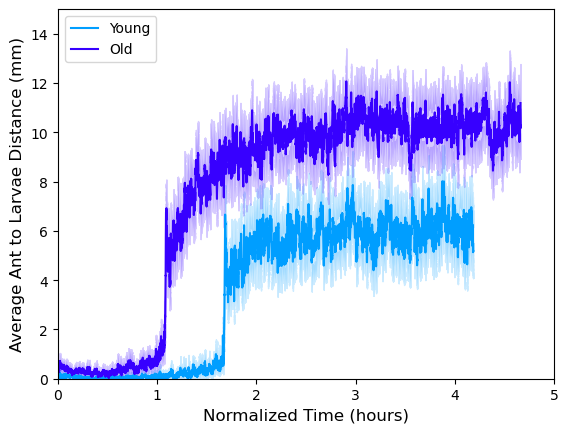

In [ ]:
#This code plot the interpolated dal data over meanS1 meanS2 normalized frame steps. possilby can change output colors in kwargs.
import seaborn as sns
import matplotlib.pyplot as plt

colorset = [sns.color_palette("hsv")[3], sns.color_palette("hsv")[4]]
sns.lineplot(x = 'Normalized Time (hours)', y = 'Interpolated Distance between Ant and Larva (mm)', data = interpolated_dal3, hue = 'Age', palette = colorset)
plt.ylim(0, 15)
plt.xlim(0,5)
plt.xlabel('Normalized Time (hours)',fontsize=12)
plt.ylabel('Average Ant to Larvae Distance (mm)', fontsize=12)
plt.legend(loc='upper left')
plt.savefig('/Users/Alex/Desktop/Figure_1E_Code_and_Data/output_files/Fig_1E_plot.pdf', format = 'pdf', dpi=600, bbox_inches='tight')
#plt.savefig('/Users/Alex/Desktop/Figure_1E_Code_and_Data/output_files/Fig_1E_plot.svg', format = 'svg', dpi=600, bbox_inches='tight')
plt.show()


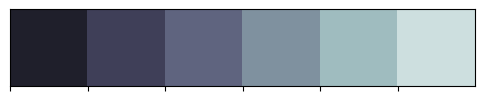

In [80]:

# import module 
import pandas as pd 
import seaborn as sns 
  
sns.palplot(sns.color_palette("bone"))
